In [1]:
import healpy as hp 
import sys
import os
import numpy as np
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2
from taunet.Noise.ncm import NoiseModel

In [3]:
ncm = NoiseModel()

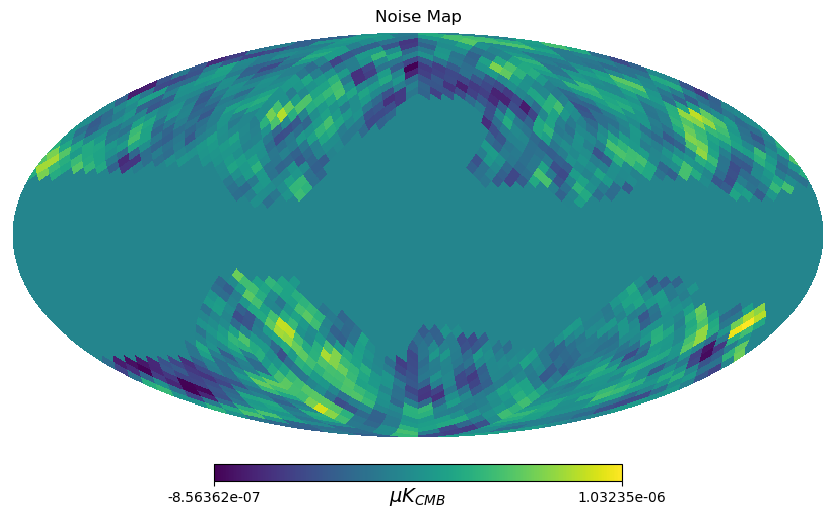

In [4]:
hp.mollview(ncm.noisemap(100,order='nested',unit='K')[0], title='Noise Map', unit=r'$\mu K_{CMB}$', nest=True)

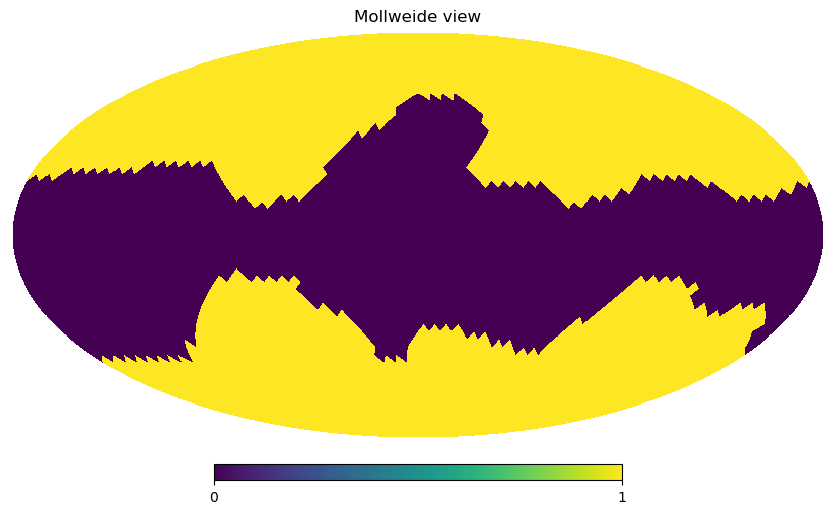

In [5]:
hp.mollview(ncm.polmask('nested'),nest=True)

In [6]:
main_dir = '/marconi/home/userexternal/aidicher/storage/TAUNET'
ncm_dir = os.path.join(main_dir,'NCM')
os.makedirs(ncm_dir,exist_ok=True)

In [7]:
for f in [30,100,143,353]:
    cov = ncm.get_full_ncm(143,unit='K',pad_temp=True,reshape=True,order='nested')
    cov.tofile(os.path.join(ncm_dir,'ncm_{}.bin'.format(f)))

In [15]:
mask = ncm.polmask('nested')

In [16]:
hp.write_map(os.path.join(main_dir,'mask.fits'),[mask,mask,mask],nest=True,overwrite=True)

setting the output map dtype to [dtype('float32'), dtype('float32'), dtype('float32')]
